<a href="https://colab.research.google.com/github/ursmindflayer/ursmindflayer/blob/main/Intelligent_Resume_Screening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
gauravduttakiit_resume_dataset_path = kagglehub.dataset_download('gauravduttakiit/resume-dataset')

print('Data source import complete.')

Data source import complete.


In [47]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import torch
import torch.nn as nn
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/resume-dataset/UpdatedResumeDataSet.csv


In [3]:
data_path="/kaggle/input/resume-dataset/UpdatedResumeDataSet.csv"

In [4]:
category=['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing']

In [5]:
df=pd.read_csv(data_path)

In [6]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [8]:
df["Category"].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [9]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [10]:
import spacy
import nltk

from nltk.corpus import stopwords
import spacy
from spacy.cli import download
from spacy import load
nlp = spacy.load("en_core_web_sm")
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('wordnet2022')
nlp = load('en_core_web_sm')
! cp -rf /usr/share/nltk_data/corpora/wordnet2022 /usr/share/nltk_data/corpora/wordnet


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet2022 to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet2022.zip.


cp: cannot stat '/usr/share/nltk_data/corpora/wordnet2022': No such file or directory


In [11]:
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
class Preprocessing(nn.Module):
    def __init__(self, cat_list):
        super(Preprocessing, self).__init__()
        self.catl=cat_list

    def preprocess_text(self, text):
        text = text.lower()                            # Lowercase
        text = re.sub(r'[^\w\s.]', '', text)  # Remove punctuation
        text =re.sub(r'(?i)(?<=\b[a-z])\.(?=[a-z]{2,}\b)', '', text)
        text = re.sub(r"\s+", " ", text).strip()       # Remove extra whitespace
        text = re.sub(r'\r\n', ' ', text)
        tokens = text.split()  # Simple tokenization
        # lemmatizer = WordNetLemmatizer()
        # tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Lemmatization and stopword removal
        return ' '.join(tokens)


    def forward(self, data):
        df=data.copy()
        df['Resume']=df['Resume'].apply(self.preprocess_text)
        return df


In [13]:
preprocess=Preprocessing(category)
df_cleaned=preprocess(df)

In [14]:
df_cleaned["Resume"][69]

'key skills â computerized accounting with tally â sincere hard working â management accounting income tax â good communication leadership â two and four wheeler driving license â internet ecommerce management computer skills â c language â web programing â tally â dbms education details june 2017 to june 2019 mba financehr india mlrit june 2014 to june 2017 bcom computer hyderabad telangana osmania university june 2012 to april 2014 inter mec india srimedhav hr nani skill details accounting exprience 6 months database management system exprience 6 months dbms exprience 6 months management accounting exprience 6 months ecommerce exprience 6 monthscompany details company valuelabs description they will give the rrf form the required dlt then the hand over to rlt then scrum master will take the form from the rlt then scrum master will give the forms to trainee which we can work on the requirement till the candidate receive the offer from the company'

In [15]:
test=df["Resume"][69]

In [16]:
cleaned_test=preprocess.preprocess_text(test)
print(cleaned_test)

key skills â computerized accounting with tally â sincere hard working â management accounting income tax â good communication leadership â two and four wheeler driving license â internet ecommerce management computer skills â c language â web programing â tally â dbms education details june 2017 to june 2019 mba financehr india mlrit june 2014 to june 2017 bcom computer hyderabad telangana osmania university june 2012 to april 2014 inter mec india srimedhav hr nani skill details accounting exprience 6 months database management system exprience 6 months dbms exprience 6 months management accounting exprience 6 months ecommerce exprience 6 monthscompany details company valuelabs description they will give the rrf form the required dlt then the hand over to rlt then scrum master will take the form from the rlt then scrum master will give the forms to trainee which we can work on the requirement till the candidate receive the offer from the company


In [17]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [18]:
all_sentences=''
total_words=[]
cleaned_sentences=df_cleaned["Resume"].values
for sent in cleaned_sentences:
    all_sentences+=sent
    tokens=sent.split()
    for token in tokens:
        if token not in stop_words and len(token)>1 and not token.isdigit():
            total_words.append(token)

In [20]:
from collections import Counter

wordFreq = Counter(total_words)
mostcommon = wordFreq.most_common(30)
mostcommon

[('exprience', 3829),
 ('company', 3420),
 ('project', 3249),
 ('months', 3194),
 ('description', 3122),
 ('details', 3094),
 ('data', 2021),
 ('management', 1827),
 ('team', 1664),
 ('maharashtra', 1437),
 ('year', 1282),
 ('system', 1242),
 ('testing', 1171),
 ('business', 1165),
 ('database', 1158),
 ('less', 1145),
 ('using', 1124),
 ('skill', 1101),
 ('development', 1097),
 ('january', 1090),
 ('test', 1050),
 ('engineering', 1041),
 ('developer', 979),
 ('java', 977),
 ('work', 945),
 ('client', 921),
 ('pune', 912),
 ('application', 906),
 ('ltd', 893),
 ('skills', 890)]

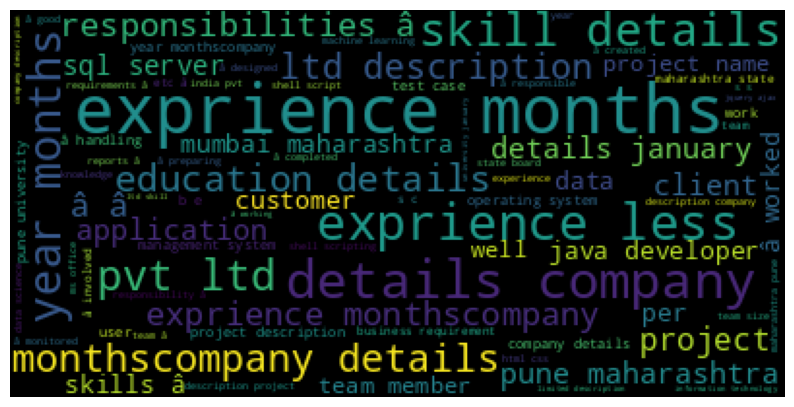

In [21]:
wordcloud=WordCloud().generate(all_sentences)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
vectorizer=TfidfVectorizer()

In [23]:
df_cleaned["enc_category"]=le.fit_transform(df_cleaned["Category"])

In [24]:
category_enc=[ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23]

In [25]:
y=df_cleaned["enc_category"]
X=vectorizer.fit_transform(df_cleaned["Resume"])

In [26]:
cleaned_test_x=vectorizer.transform([cleaned_test])

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report

In [29]:
ovrc_model=OneVsRestClassifier(LogisticRegression())
ovrc_model.fit(X_train, y_train)
y_pred=ovrc_model.predict(X_test)

In [30]:
test_pred=ovrc_model.predict(cleaned_test_x)

In [31]:
print("Predicted:",le.inverse_transform(test_pred))
print("Actual:", df_cleaned["Category"][69])

Predicted: ['HR']
Actual: HR


In [32]:
print(classification_report(y_test, y_pred, target_names=category))

                           precision    recall  f1-score   support

             Data Science       1.00      1.00      1.00         7
                       HR       1.00      1.00      1.00        10
                 Advocate       1.00      1.00      1.00         7
                     Arts       1.00      1.00      1.00        12
            Web Designing       1.00      1.00      1.00         9
      Mechanical Engineer       1.00      1.00      1.00        14
                    Sales       1.00      1.00      1.00        12
       Health and fitness       1.00      1.00      1.00         9
           Civil Engineer       1.00      0.90      0.95        21
           Java Developer       1.00      1.00      1.00        11
         Business Analyst       1.00      1.00      1.00         9
            SAP Developer       1.00      1.00      1.00        10
       Automation Testing       1.00      1.00      1.00        18
   Electrical Engineering       1.00      1.00      1.00     

In [33]:
df_cleaned["Resume"][9]

'expertise â data and quantitative analysis â decision analytics â predictive modeling â datadriven personalization â kpi dashboards â big data queries and interpretation â data mining and visualization tools â machine learning algorithms â business intelligence bi â research reports and forecasts education details pgp in data science mumbai maharashtra aegis school of data science business b.e. in electronics communication electronics communication indore madhya pradesh ies ips academy data scientist data scientist with pr canada skill details algorithms exprience 6 months bi exprience 6 months business intelligence exprience 6 months machine learning exprience 24 months visualization exprience 24 months spark exprience 24 months python exprience 36 months tableau exprience 36 months data analysis exprience 24 monthscompany details company aegis school of data science business description mostly working on industry project for providing solution along with teaching appointments teach 

In [34]:
temp_sent=df_cleaned["Resume"][10]
print(temp_sent)

skills programming languages python pandas numpy scipy scikitlearn matplotlib sql java javascriptjquery. machine learning regression svm naãve bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural nets. database visualizations mysql sqlserver cassandra hbase elasticsearch d3.js dc.js plotly kibana matplotlib ggplot tableau. others regular expression html css angular 6 logstash kafka python flask git docker computer vision open cv and understanding of deep learning.education details data science assurance associate data science assurance associate ernst young llp skill details javascript exprience 24 months jquery exprience 24 months python exprience 24 monthscompany details company ernst young llp description fraud investigations and dispute services assurance technology assisted review tar technology assisted review assists in accelerating the

In [35]:
keywords={"skills":[], "exprience":[], "company":[], "project":[], "education detail":[]}
experience_keywords=["company details"]

In [41]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
sentences=sent_tokenize(temp_sent)
experience_sent=[]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [38]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [40]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [42]:
for word in keywords:
    for token in sentences:
        if word in token:
            keywords[word].append(token)

In [43]:
keywords

{'skills': ['skills programming languages python pandas numpy scipy scikitlearn matplotlib sql java javascriptjquery.'],
 'exprience': ['others regular expression html css angular 6 logstash kafka python flask git docker computer vision open cv and understanding of deep learning.education details data science assurance associate data science assurance associate ernst young llp skill details javascript exprience 24 months jquery exprience 24 months python exprience 24 monthscompany details company ernst young llp description fraud investigations and dispute services assurance technology assisted review tar technology assisted review assists in accelerating the review process and run analytics and generate reports.'],
 'company': ['others regular expression html css angular 6 logstash kafka python flask git docker computer vision open cv and understanding of deep learning.education details data science assurance associate data science assurance associate ernst young llp skill details jav

In [44]:
import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import spacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

def extract_resume_information(resume_text):
    # Normalize text
    resume_text = resume_text.lower().replace('\n', ' ')

    # Define common section headers in resumes
    section_headers = {
        'education': ['education', 'academic background', 'qualifications', 'degrees'],
        'experience': ['experience', 'work history', 'employment', 'work experience', 'professional experience'],
        'skills': ['skills', 'technical skills', 'competencies', 'expertise'],
        'projects': ['projects', 'project experience', 'key projects'],
        'certifications': ['certifications', 'certificates', 'professional certifications'],
        'contact': ['contact', 'personal information', 'contact details']
    }

    # Initialize results dictionary
    extracted_info = {
        'education': [],
        'experience': [],
        'skills': [],
        'projects': [],
        'certifications': [],
        'contact': [],
        'companies': [],
        'job_titles': [],
        'technologies': [],
        'duration': []
    }

    # Process with spaCy for entity recognition
    doc = nlp(resume_text)

    # Extract entities
    for ent in doc.ents:
        if ent.label_ == "ORG":
            extracted_info['companies'].append(ent.text)
        elif ent.label_ == "DATE":
            # Look for duration patterns
            if re.search(r'\b(year|month|yr|mo)\b', ent.text):
                extracted_info['duration'].append(ent.text)

    # Split into sentences
    sentences = sent_tokenize(resume_text)

    # Extract information from each sentence
    for sent in sentences:
        # Process sentence with spaCy
        sent_doc = nlp(sent)

        # Identify skills (technology keywords)
        tech_keywords = ['python', 'java', 'javascript', 'sql', 'ml', 'ai', 'machine learning',
                        'neural', 'react', 'angular', 'node', 'aws', 'azure', 'cloud', 'docker']
        for keyword in tech_keywords:
            if re.search(r'\b' + keyword + r'\b', sent):
                if keyword not in extracted_info['technologies']:
                    extracted_info['technologies'].append(keyword)

        # Look for job titles
        job_titles = ['engineer', 'developer', 'manager', 'analyst', 'scientist', 'associate',
                     'consultant', 'director', 'lead', 'architect']
        for title in job_titles:
            # Look for patterns like "senior software engineer"
            job_pattern = re.search(r'\b\w+\s+\w+\s+' + title + r'\b|\b\w+\s+' + title + r'\b', sent)
            if job_pattern and job_pattern.group() not in extracted_info['job_titles']:
                extracted_info['job_titles'].append(job_pattern.group())

        # Categorize sentence into sections
        for section, headers in section_headers.items():
            for header in headers:
                if re.search(r'\b' + header + r'\b', sent):
                    extracted_info[section].append(sent)
                    break

    # Look for experience with context
    experience_pattern = re.compile(r'(?:([a-z ]+) experience:? ([0-9]+) (?:years|months|year|month))|(?:([0-9]+) (?:years|months|year|month) (?:of)? ([a-z ]+) experience)', re.IGNORECASE)
    experience_matches = experience_pattern.findall(resume_text)
    for match in experience_matches:
        parts = [p for p in match if p]
        if len(parts) >= 2:
            skill = parts[0] if not parts[0].isdigit() else parts[1]
            duration = parts[0] if parts[0].isdigit() else parts[1]
            extracted_info['skills'].append(f"{skill}: {duration} {'years' if 'year' in parts[1] else 'months'}")

    # Clean up results
    for key in extracted_info:
        extracted_info[key] = list(set(extracted_info[key]))

    return extracted_info

In [45]:
gg=extract_resume_information(temp_sent)

In [46]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True